In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
# from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
train =  pd.read_csv('/home/yash/introdatascience/project/data/train.csv')
test =  pd.read_csv('/home/yash/introdatascience/project/data/test.csv')

/home/yash/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


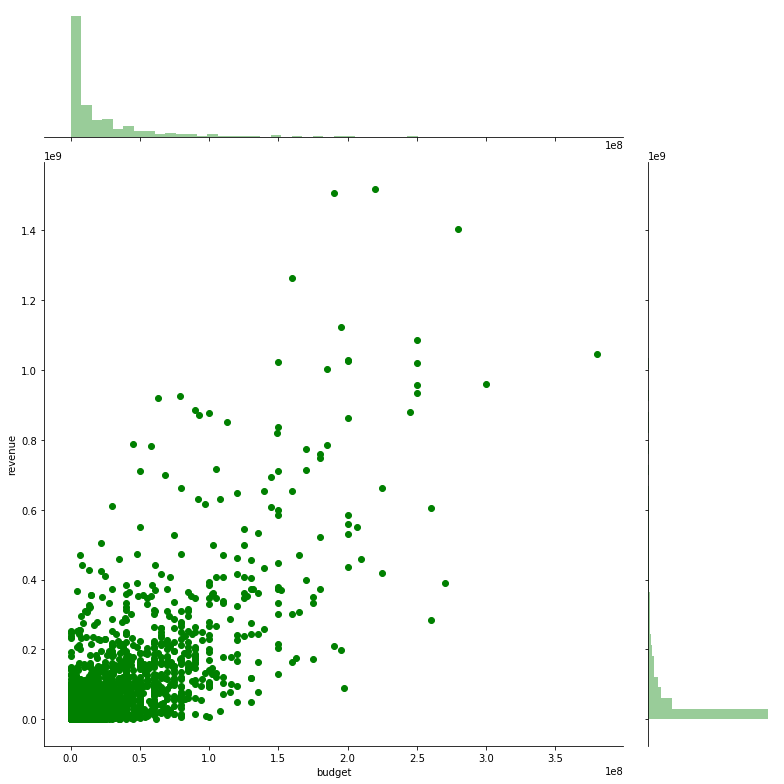

In [5]:
sns.jointplot(x="budget", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

/home/yash/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


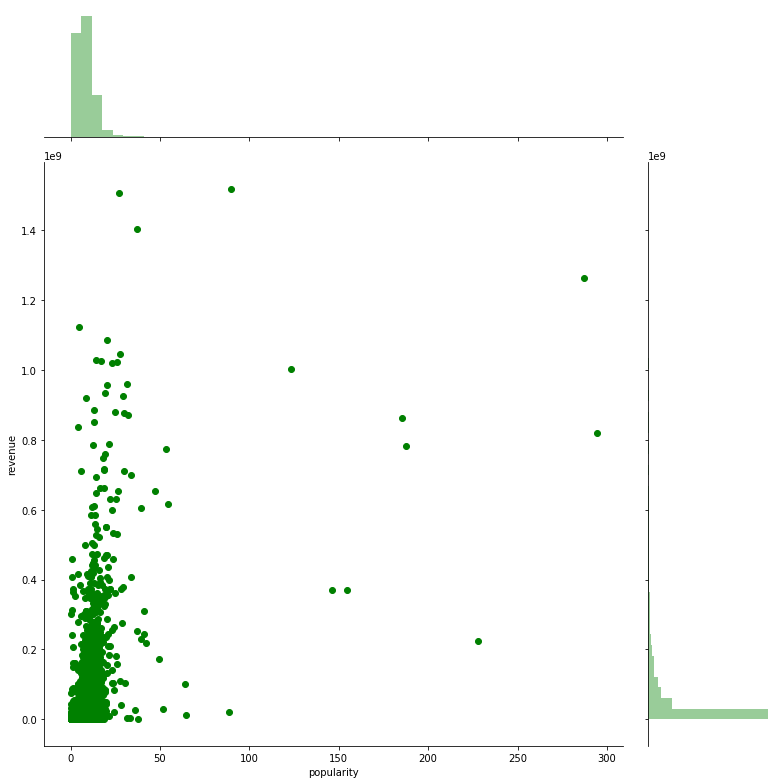

In [6]:
sns.jointplot(x="popularity", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

/home/yash/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


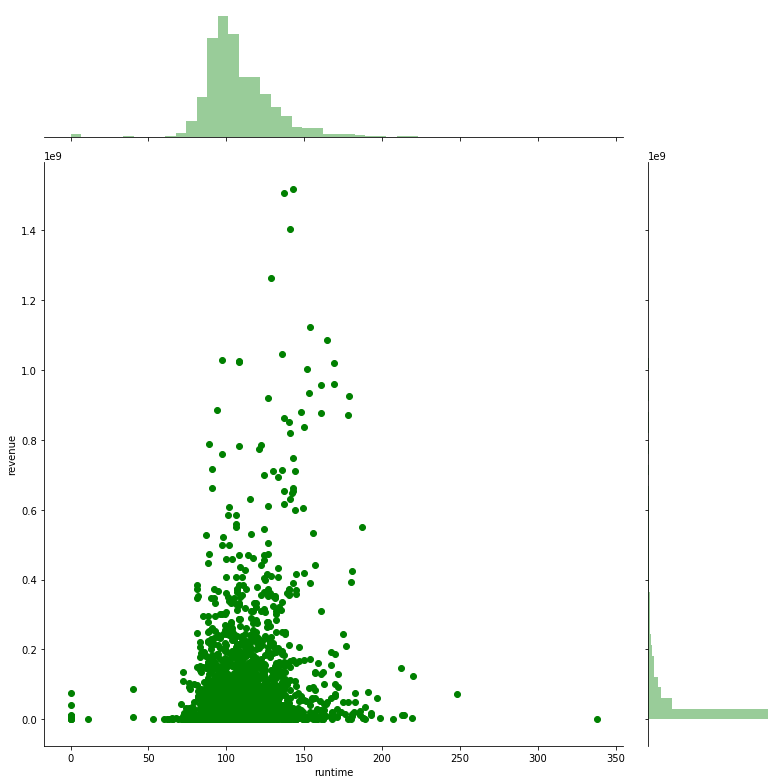

In [7]:
sns.jointplot(x="runtime", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

/home/yash/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


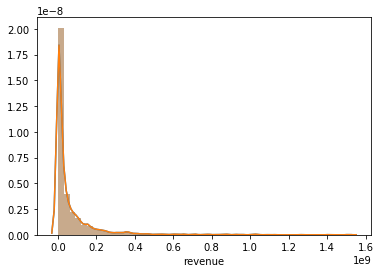

In [9]:
sns.distplot(train.revenue)
plt.show()

/home/yash/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


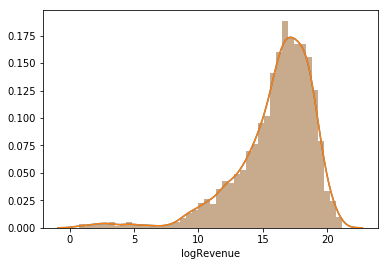

In [11]:
train['logRevenue'] = np.log1p(train['revenue'])
sns.distplot(train['logRevenue'] )
plt.show()

In [12]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

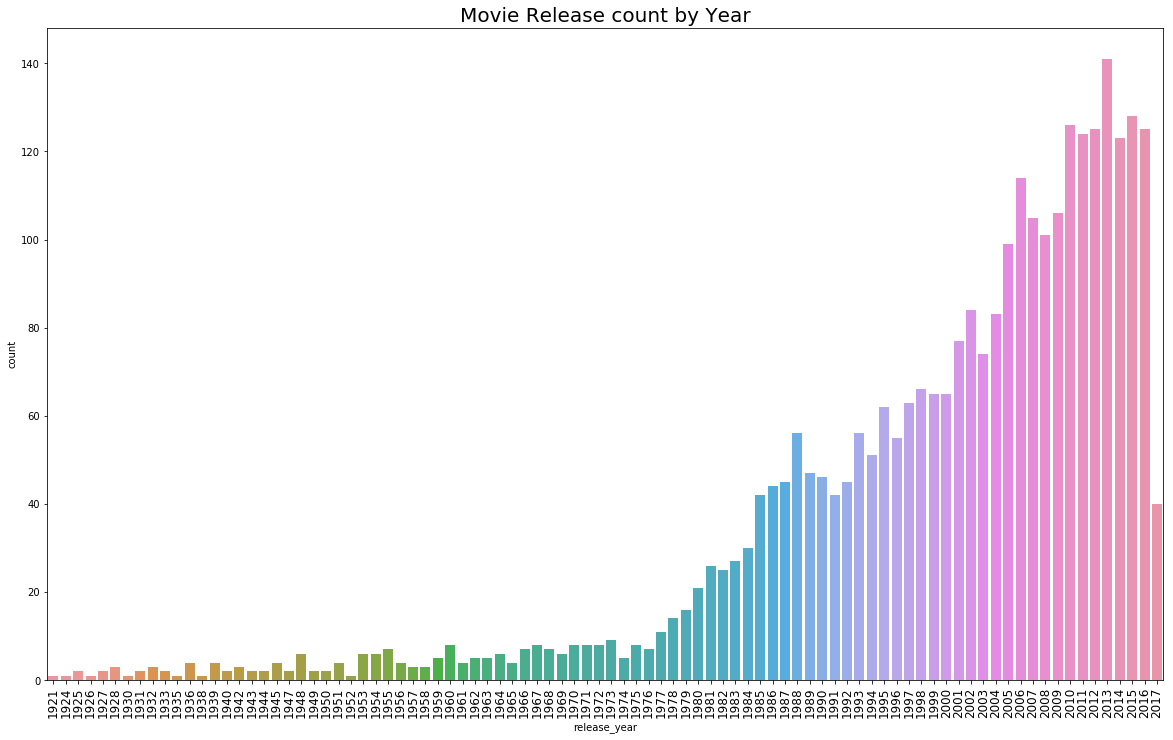

In [13]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

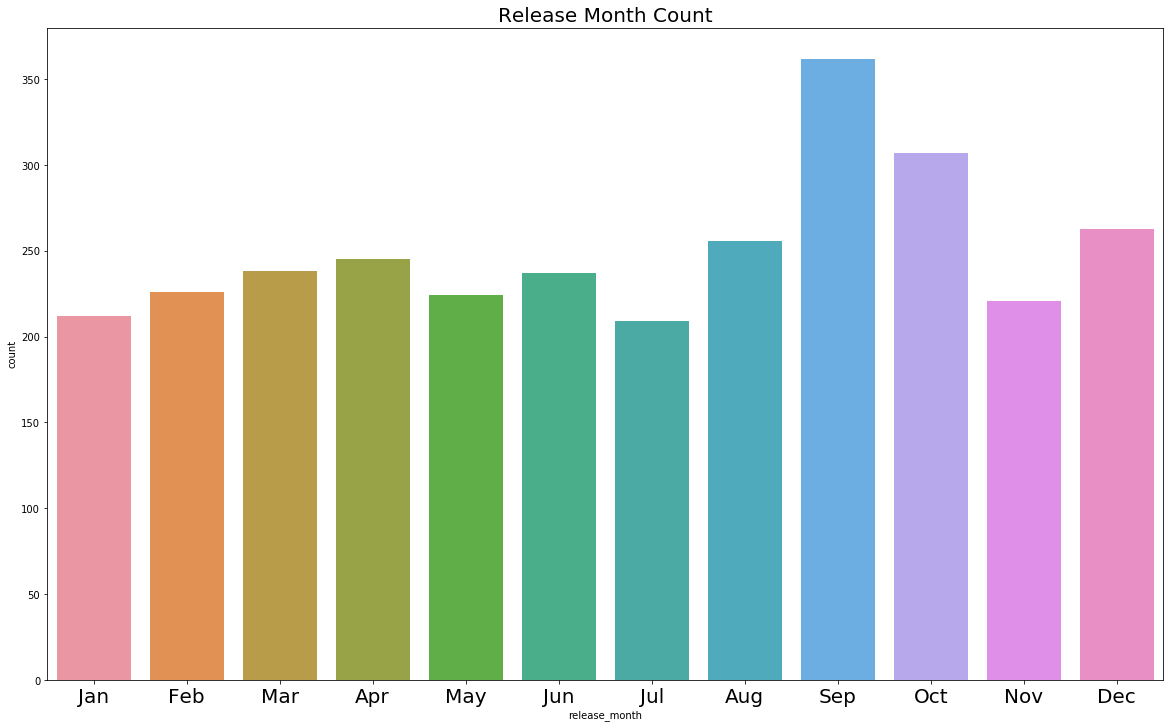

In [14]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_month'].sort_values())
plt.title("Release Month Count",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

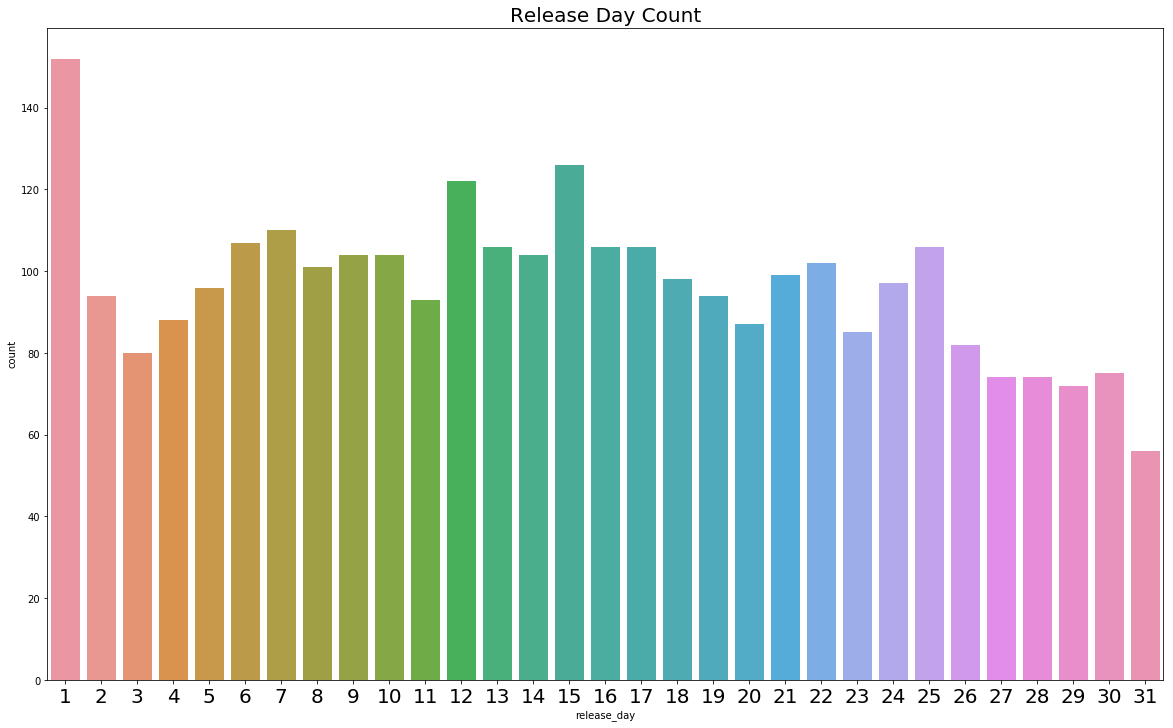

In [15]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_day'].sort_values())
plt.title("Release Day Count",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

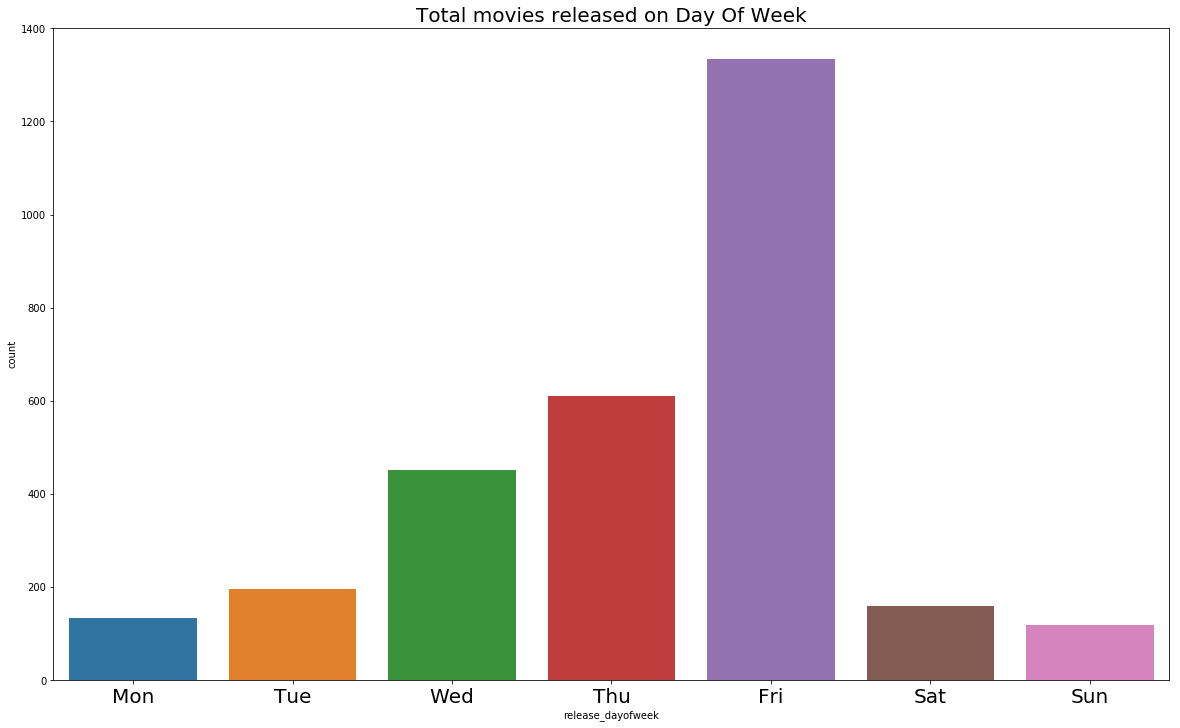

In [16]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

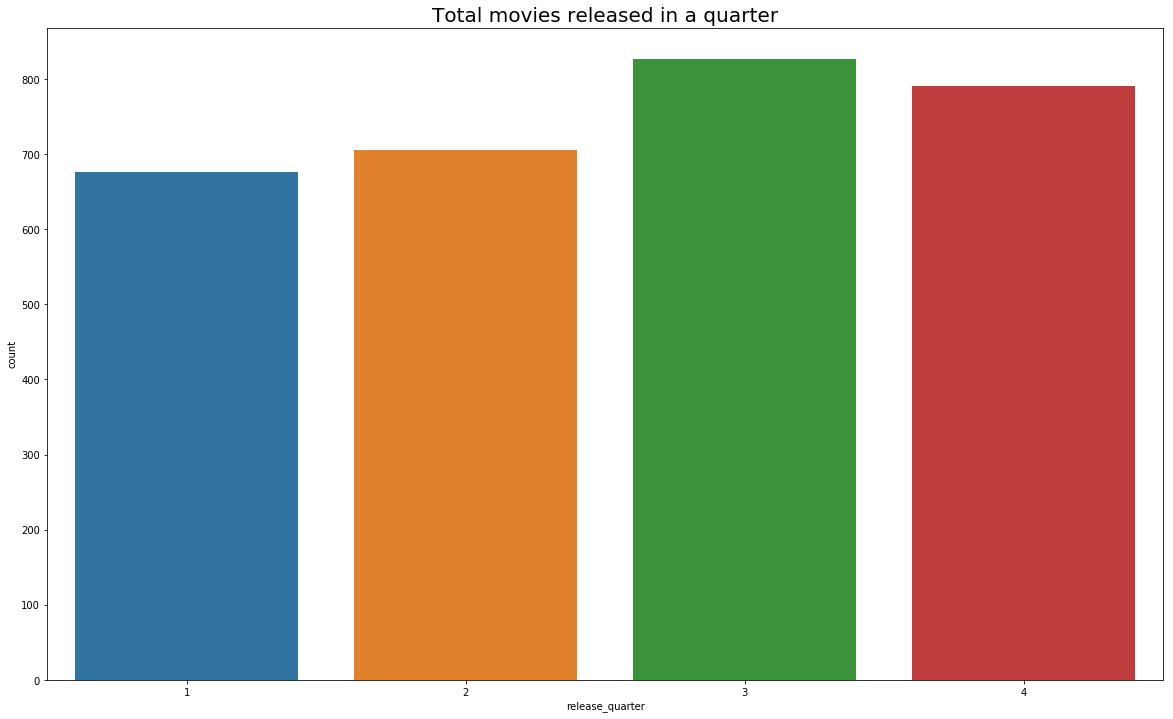

In [17]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_quarter'].sort_values())
plt.title("Total movies released in a quarter",fontsize=20)
plt.show()


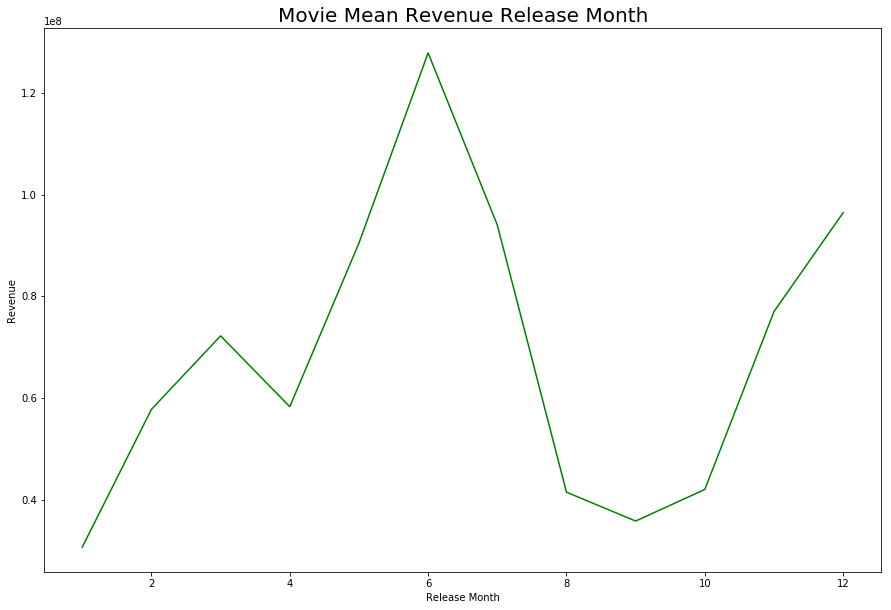

In [18]:
train['meanRevenueByMonth'] = train.groupby("release_month")["revenue"].aggregate('mean')
train['meanRevenueByMonth'].plot(figsize=(15,10),color="g")
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue Release Month",fontsize=20)
plt.show()

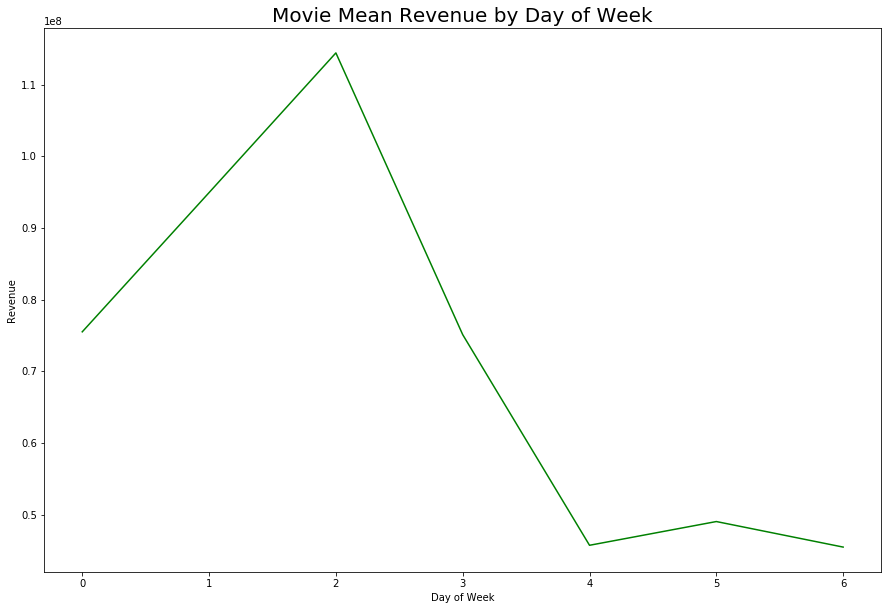

In [19]:
train['meanRevenueByDayOfWeek'] = train.groupby("release_dayofweek")["revenue"].aggregate('mean')
train['meanRevenueByDayOfWeek'].plot(figsize=(15,10),color="g")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Day of Week",fontsize=20)
plt.show()

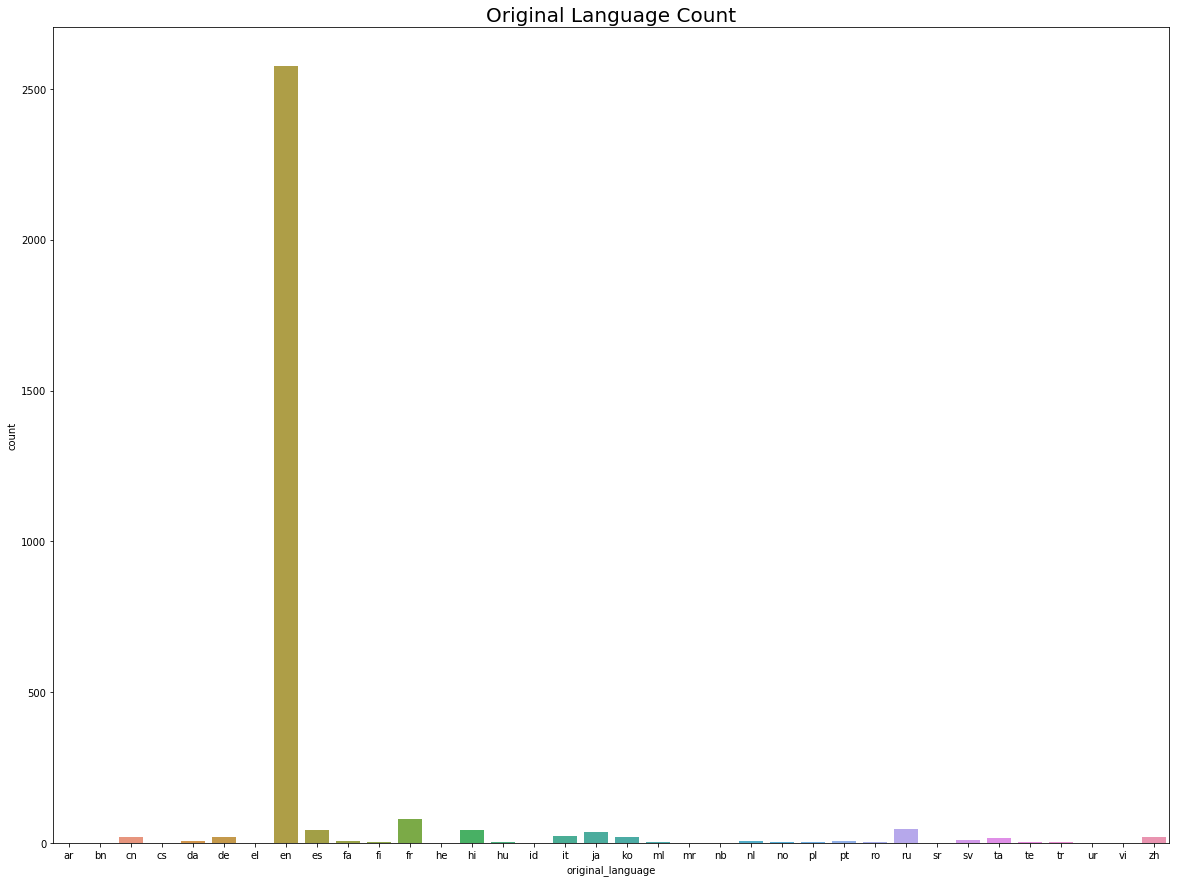

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(train['original_language'].sort_values())
plt.title("Original Language Count",fontsize=20)
plt.show()

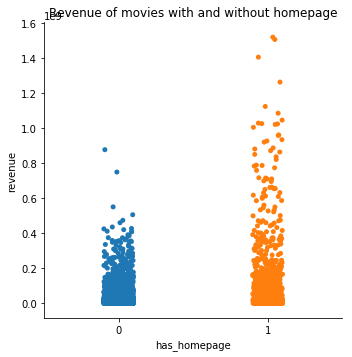

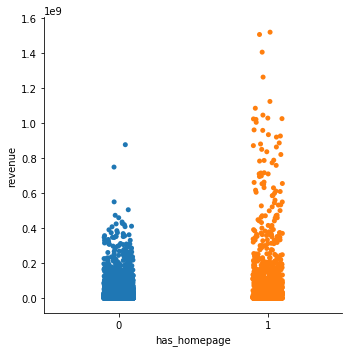

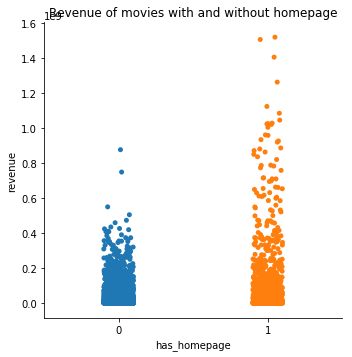

In [27]:
train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']) ,"has_homepage"] = 0
sns.catplot(x="has_homepage", y="revenue", data=train)
plt.title('Revenue of movies with and without homepage')
plt.show()

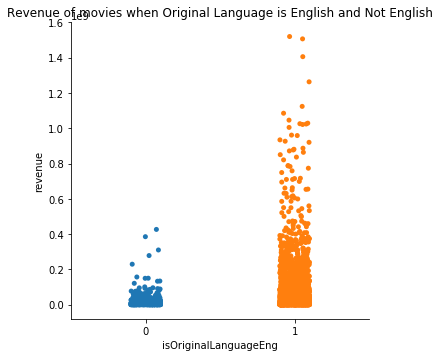

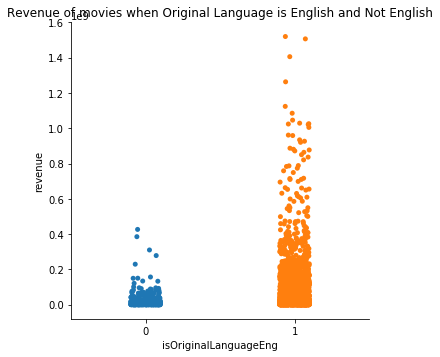

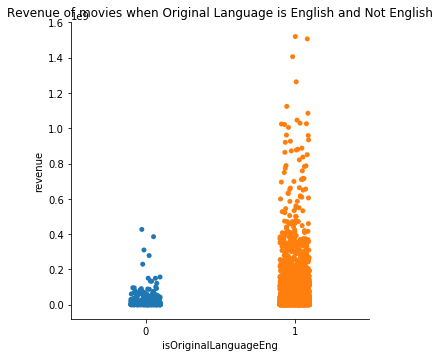

In [30]:
train['isOriginalLanguageEng'] = 0 
train.loc[ train['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
sns.catplot(x="isOriginalLanguageEng", y="revenue", data=train)
plt.title('Revenue of movies when Original Language is English and Not English')
plt.show()

In [31]:
trainAdditionalFeatures = pd.read_csv('/home/yash/introdatascience/project/data/TrainAdditionalFeatures.csv')
testAdditionalFeatures = pd.read_csv('/home/yash/introdatascience/project/data/TestAdditionalFeatures.csv')
train = pd.merge(train, trainAdditionalFeatures, how='left', on=['imdb_id'])
test = pd.merge(test, testAdditionalFeatures, how='left', on=['imdb_id'])

In [32]:
print("Missing rating in Train set", train['rating'].isna().sum())
print("Missing total Votes in Train set", train['totalVotes'].isna().sum())
print("")
print("Missing rating in Test set", test['rating'].isna().sum())
print("Missing total Votes in Test set", test['totalVotes'].isna().sum())

Missing rating in Train set 118
Missing total Votes in Train set 118

Missing rating in Test set 179
Missing total Votes in Test set 179


In [33]:
train['rating'] = train['rating'].fillna(1.5)
train['totalVotes'] = train['totalVotes'].fillna(6)

test['rating'] = test['rating'].fillna(1.5)
test['totalVotes'] = test['totalVotes'].fillna(6)

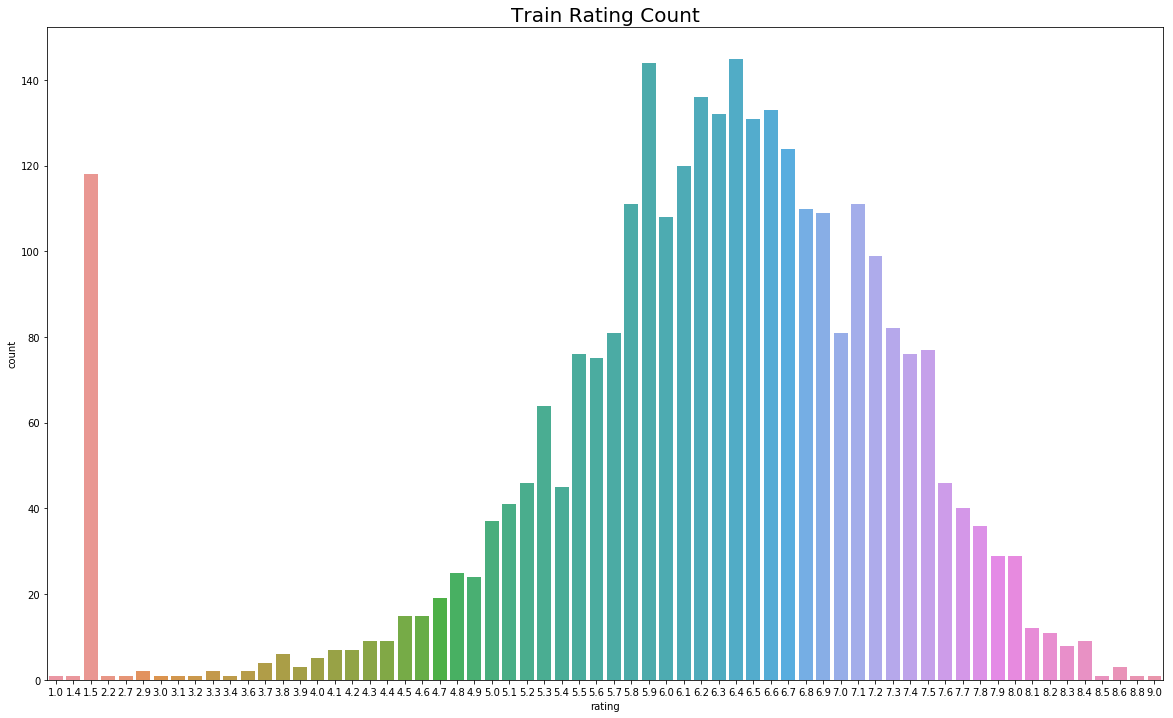

In [34]:
plt.figure(figsize=(20,12))
sns.countplot(train['rating'].sort_values())
plt.title("Train Rating Count",fontsize=20)
plt.show()

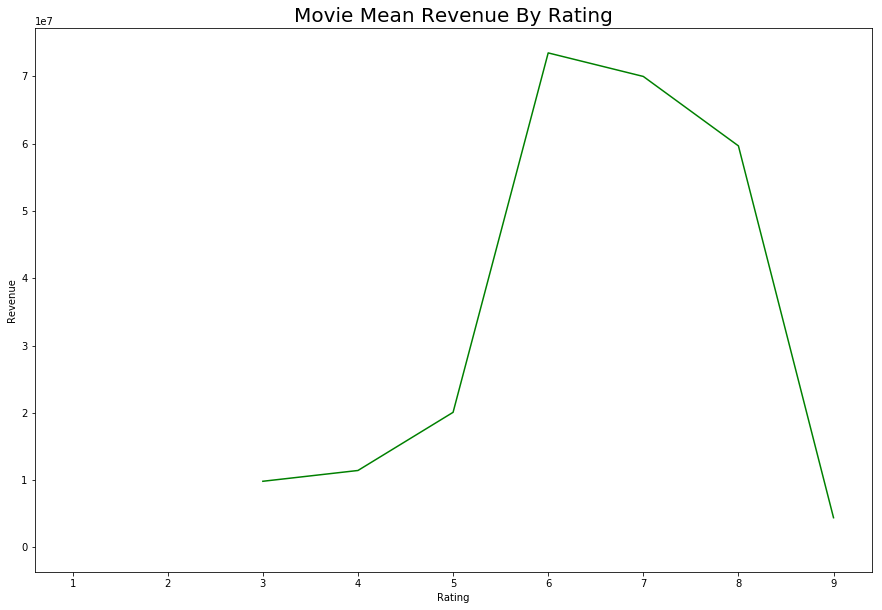

In [35]:
train['meanRevenueByRating'] = train.groupby("rating")["revenue"].aggregate('mean')
train['meanRevenueByRating'].plot(figsize=(15,10),color="g")
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Rating",fontsize=20)
plt.show()

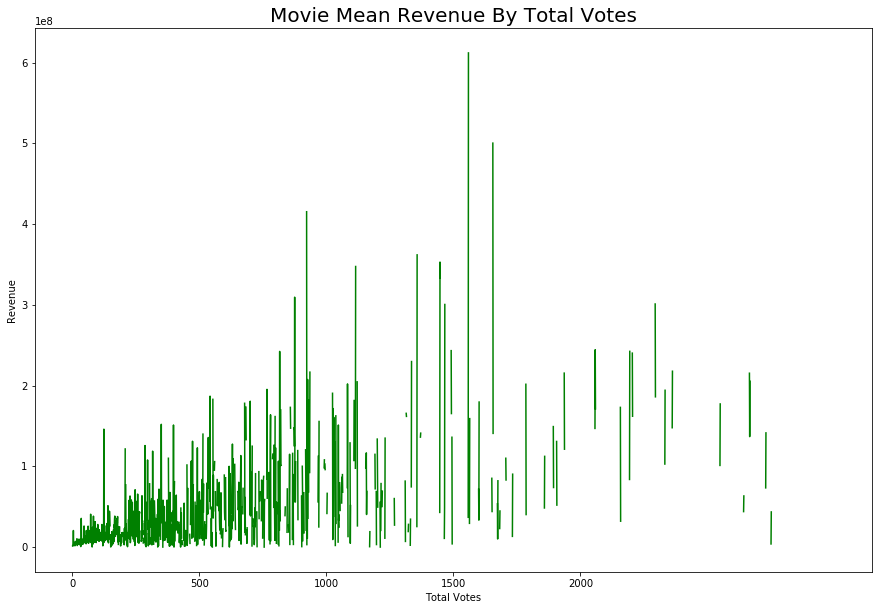

In [36]:
train['meanRevenueByTotalVotes'] = train.groupby("totalVotes")["revenue"].aggregate('mean')
train['meanRevenueByTotalVotes'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(0,2500,500))
plt.xlabel("Total Votes")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Total Votes",fontsize=20)
plt.show()


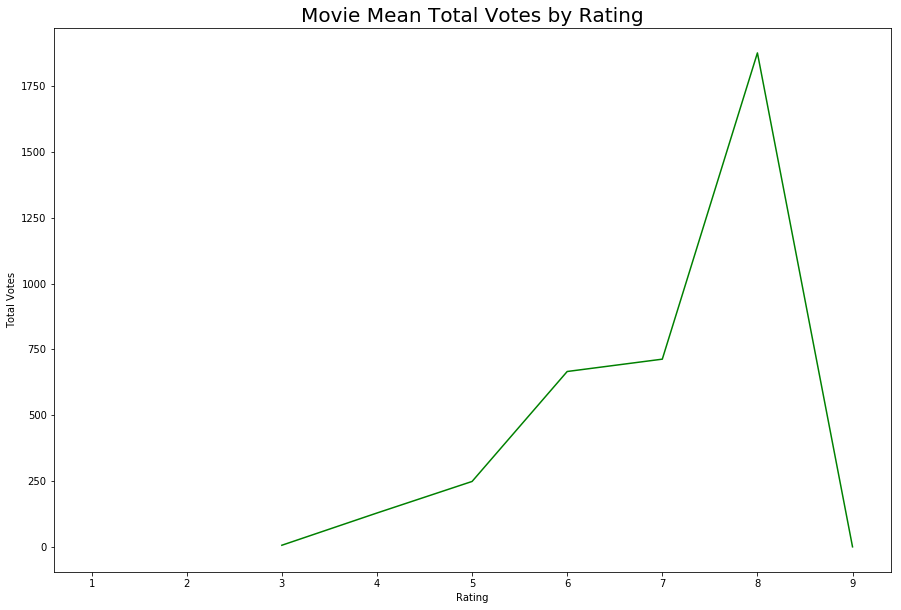

In [37]:
train['meanTotalVotesByRating'] = train.groupby("rating")["totalVotes"].aggregate('mean')
train['meanTotalVotesByRating'].plot(figsize=(15,10),color="g")
#plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Rating")
plt.ylabel("Total Votes")
plt.title("Movie Mean Total Votes by Rating",fontsize=20)
plt.show()

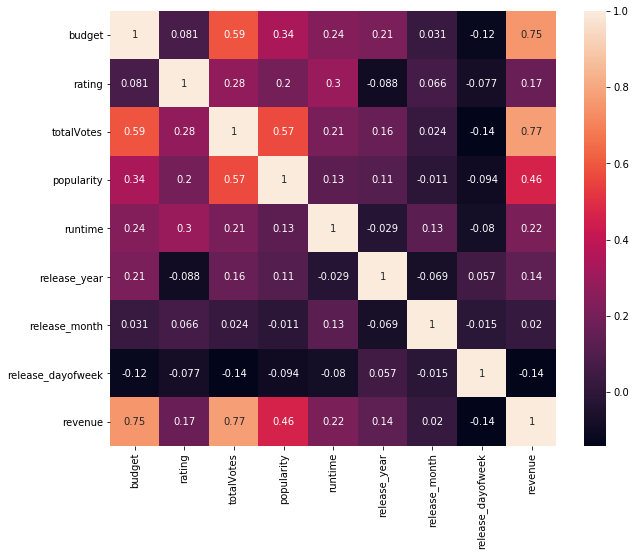

In [38]:
train = train[['budget','rating','totalVotes','popularity','runtime','release_year','release_month','release_dayofweek','revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()